In [8]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

import sys
sys.path.append("../")

from src import soporte_preprocesamiento as sl
from src import soporte_ajuste as sf
from src import soporte_encoding_logistica as se
from src import soporte_1 as sp
from src import soporte_nulos_santi as sn

import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:,.2f}".format
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# leemos el dataframe
df_employee_survey_data = pd.read_csv("../data/employee_survey_data.csv", index_col = 0).reset_index(drop=True)
df_employee_survey_data.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,3.00,4.00,2.00
1,3.00,2.00,4.00
2,2.00,2.00,1.00
3,4.00,4.00,3.00
4,4.00,1.00,3.00


In [10]:
# leemos el dataframe
df_general_data = pd.read_csv("../data/general_data.csv", index_col = 0).reset_index()
df_general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.00,Y,11,8,0,1.00,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.00,Y,23,8,1,6.00,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.00,Y,15,8,3,5.00,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.00,Y,11,8,3,13.00,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.00,Y,12,8,2,9.00,2,6,0,4


In [11]:
# leemos el dataframe
df_manager_survey_data = pd.read_csv("../data/manager_survey_data.csv", index_col = 0).reset_index(drop=True)
df_manager_survey_data.head()

,JobInvolvement,PerformanceRating
0,3,3
1,2,4
2,3,3
3,2,3
4,3,3


In [12]:
df_all = pd.concat([df_employee_survey_data, df_general_data, df_manager_survey_data], axis=1)

In [13]:
df_all.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.00,4.00,2.00,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.00,Y,11,8,0,1.00,6,1,0,0,3,3
1,3.00,2.00,4.00,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.00,Y,23,8,1,6.00,3,5,1,4,2,4
2,2.00,2.00,1.00,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.00,Y,15,8,3,5.00,2,5,0,3,3,3
3,4.00,4.00,3.00,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.00,Y,11,8,3,13.00,5,8,7,5,2,3
4,4.00,1.00,3.00,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.00,Y,12,8,2,9.00,2,6,0,4,3,3


In [14]:
# llamamos a la función para hacer el análisis exploratorio de datos
sl.exploracion_datos(df_all)

El número de filas es 4410 y el número de columnas es 29

----------

En este conjunto de datos tenemos 0 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


EnvironmentSatisfaction   0.57
JobSatisfaction           0.45
WorkLifeBalance           0.86
NumCompaniesWorked        0.43
TotalWorkingYears         0.20
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
EnvironmentSatisfaction,"4,385.00",2.72,1.09,1.00,2.00,3.00,4.00,4.00
JobSatisfaction,"4,390.00",2.73,1.10,1.00,2.00,3.00,4.00,4.00
WorkLifeBalance,"4,372.00",2.76,0.71,1.00,2.00,3.00,3.00,4.00
Age,"4,410.00",36.92,9.13,18.00,30.00,36.00,43.00,60.00
DistanceFromHome,"4,410.00",9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,"4,410.00",2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,"4,410.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeID,"4,410.00","2,205.50","1,273.20",1.00,"1,103.25","2,205.50","3,307.75","4,410.00"
JobLevel,"4,410.00",2.06,1.11,1.00,1.00,2.00,3.00,5.00
MonthlyIncome,"4,410.00","65,029.31","47,068.89","10,090.00","29,110.00","49,190.00","83,800.00","199,990.00"



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
Attrition,4410,2,No,3699
BusinessTravel,4410,3,Travel_Rarely,3129
Department,4410,3,Research & Development,2883
EducationField,4410,6,Life Sciences,1818
Gender,4410,2,Male,2646
JobRole,4410,9,Sales Executive,978
MaritalStatus,4410,3,Married,2019
Over18,4410,1,Y,4410



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Age                      4410 non-null   int64  
 4   Attrition                4410 non-null   object 
 5   BusinessTravel           4410 non-null   object 
 6   Department               4410 non-null   object 
 7   DistanceFromHome         4410 non-null   int64  
 8   Education                4410 non-null   int64  
 9   EducationField           4410 non-null   object 
 10  EmployeeCount            4410 non-null   int64  
 11  EmployeeID               4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel      

None

In [15]:
#df_all.drop(columns=['EmployeeID'], inplace=True)

In [16]:
# Crear una instancia de la clase y llamar a los métodos
visualizador =sl.Visualizador(df_all)

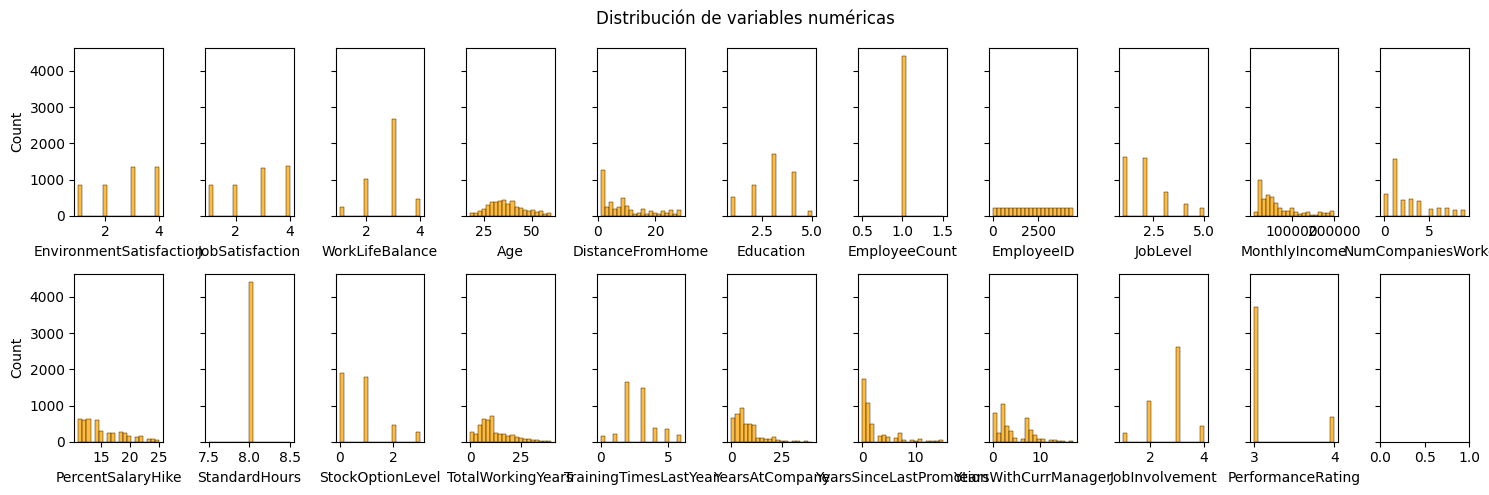

In [17]:
# exploramos la distribución de las variables numéricas
visualizador.plot_numericas(color = "orange")

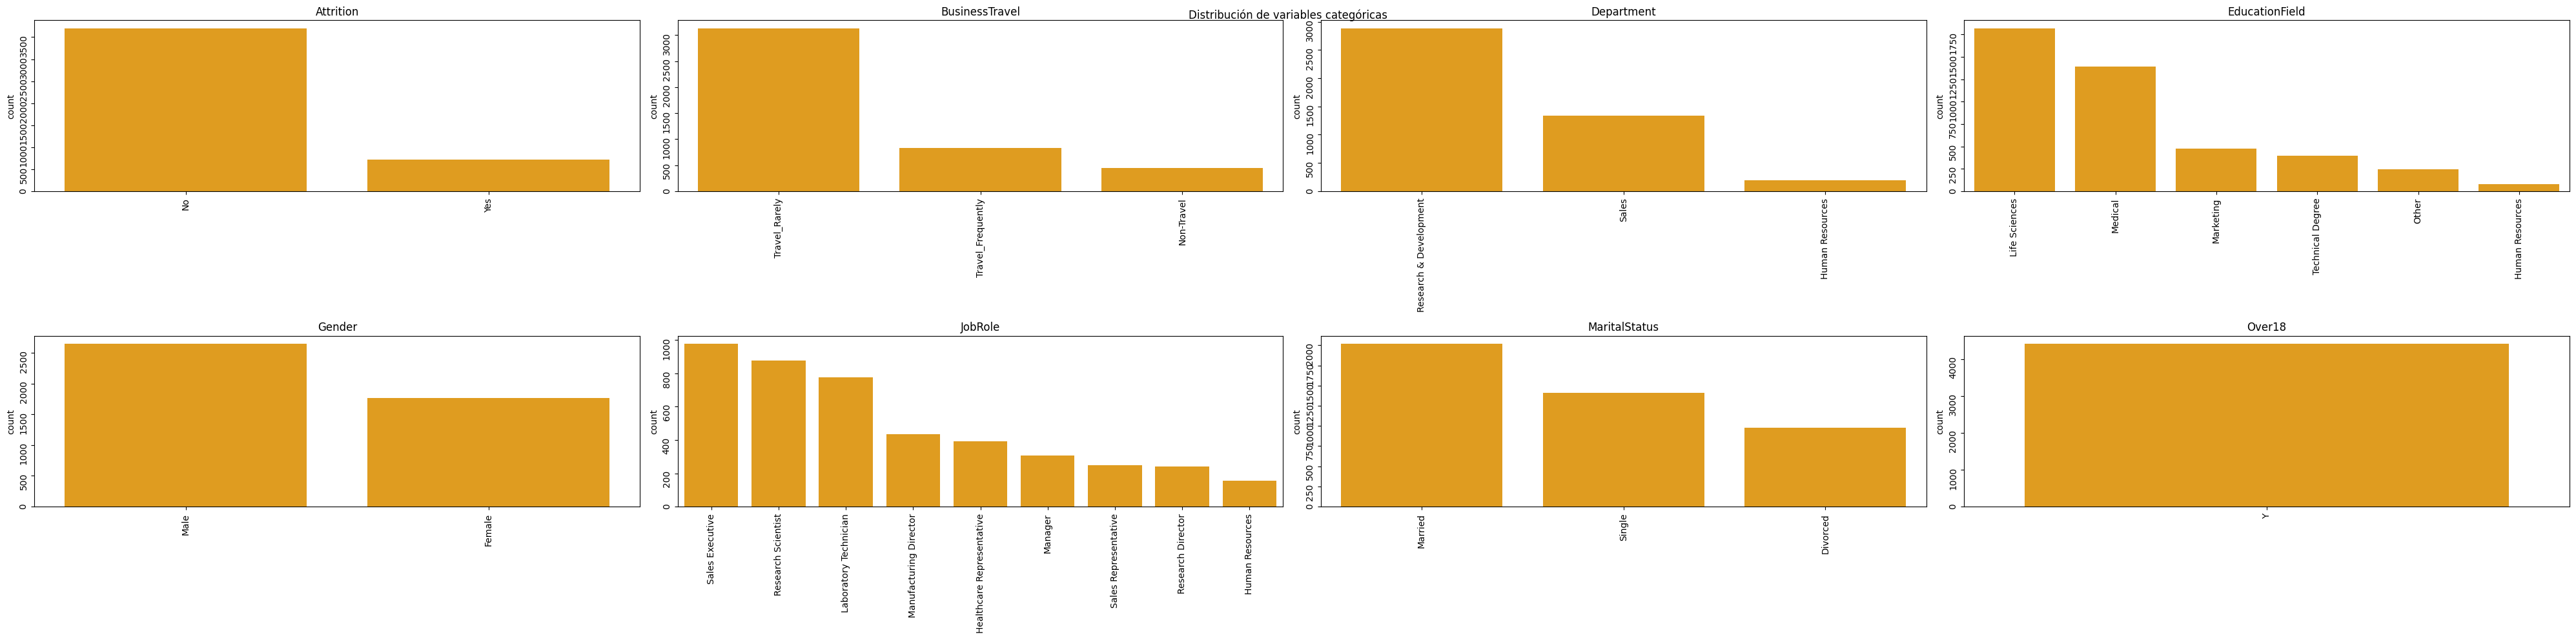

In [18]:
# evaluamos la distribución de las variables categóricas
visualizador.plot_categoricas(color = "orange")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

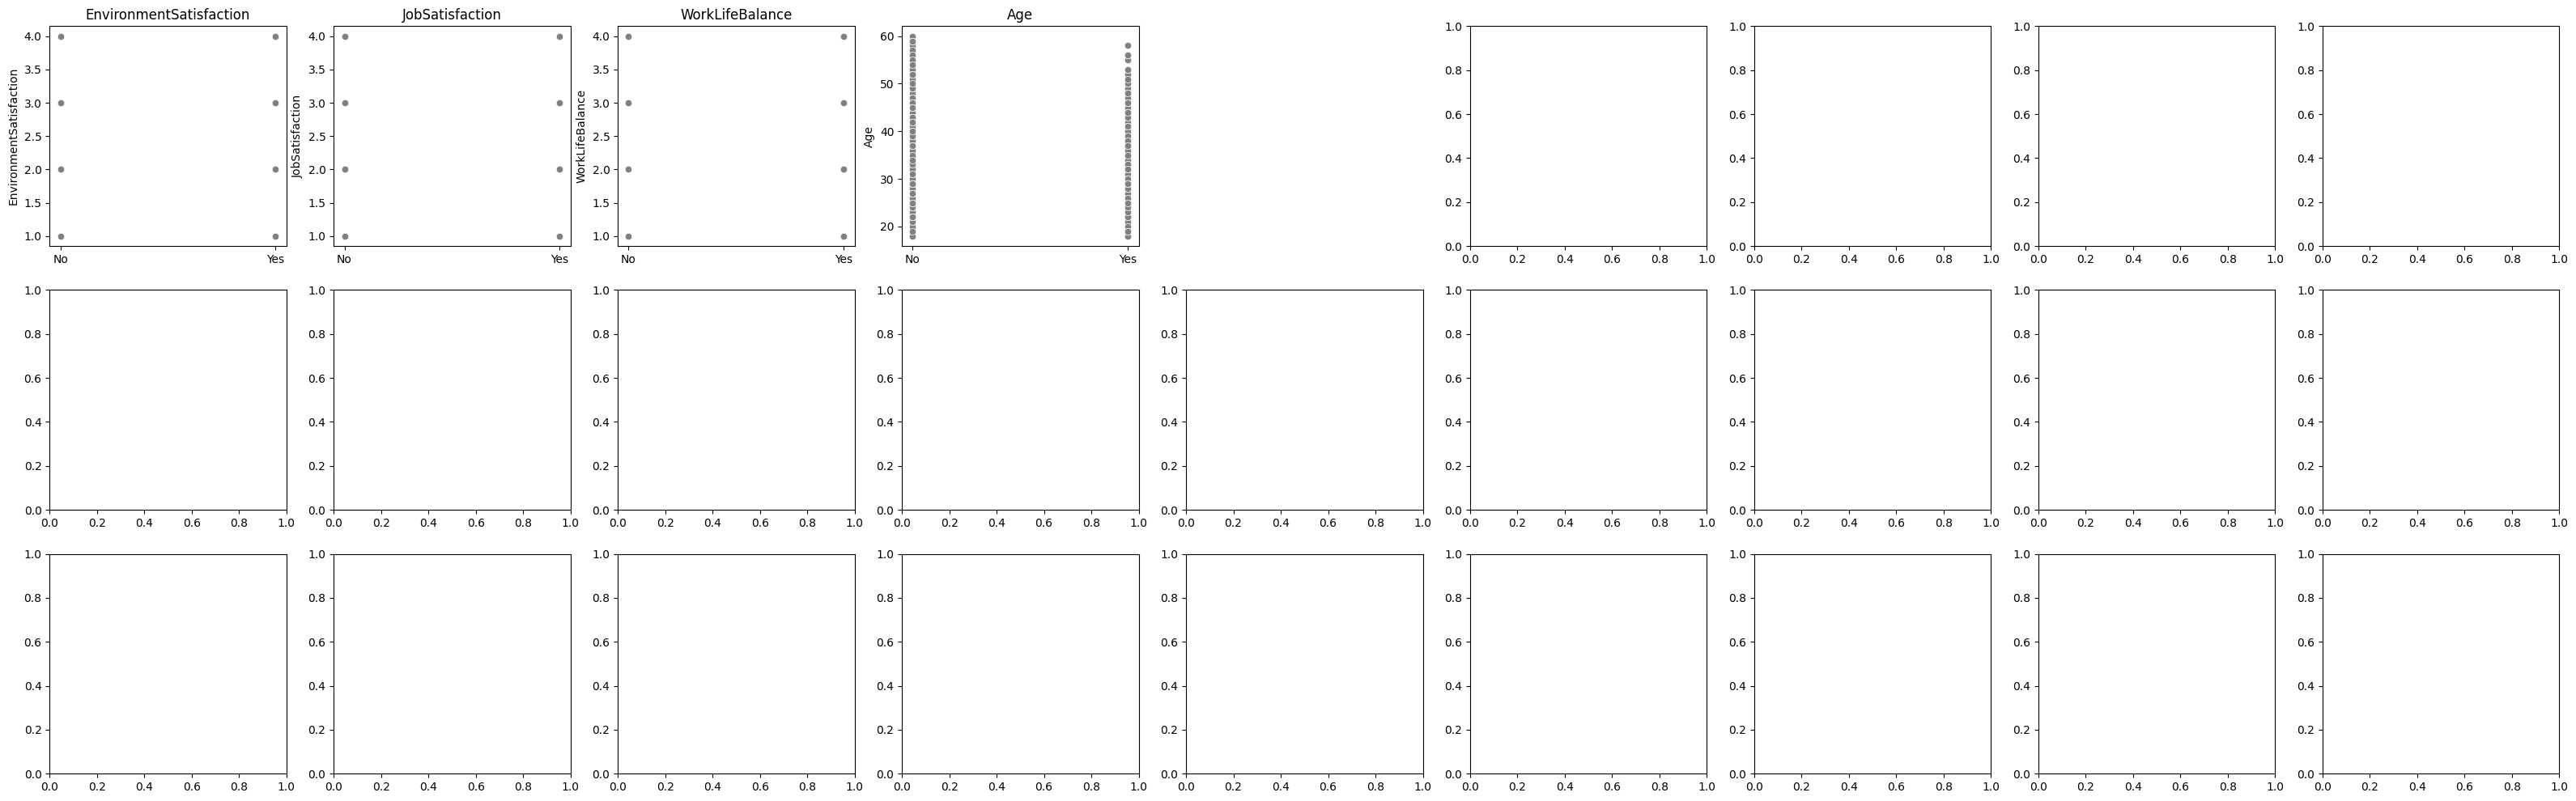

In [19]:
# evaluamos la relación entre las variables independientes y dependientes
visualizador.plot_relacion(vr = "Attrition")

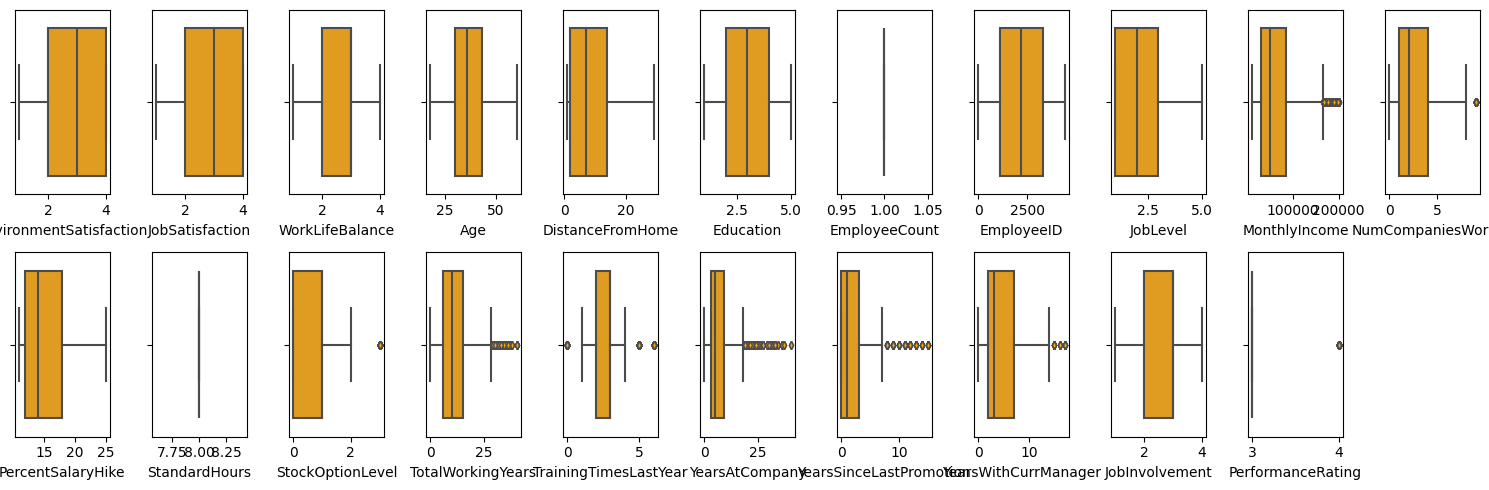

In [20]:
# detectamos los outliers
visualizador.deteccion_outliers(color = "orange")

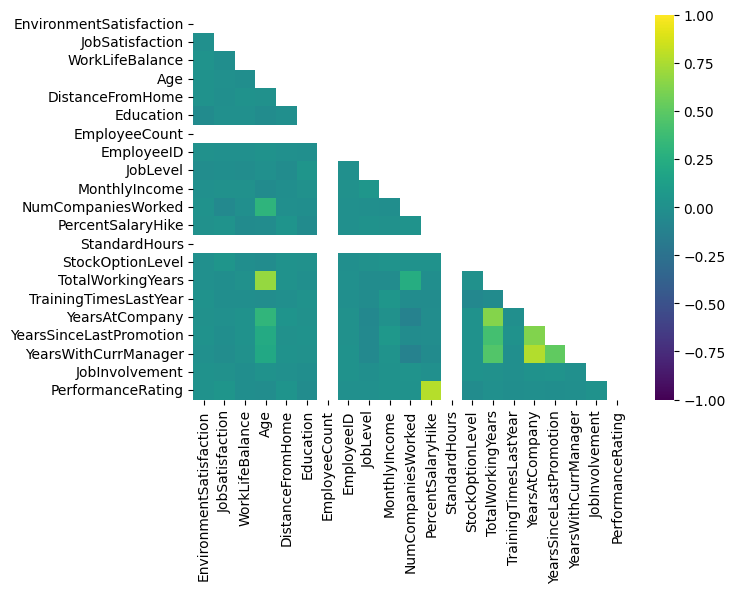

In [21]:
# evaluamos las correlaciones entre las variables numéricas
visualizador.correlacion()

In [22]:
GestorNulos = sn.GestionNulos(df_all)
columas_a_imputar_knn = ["NumCompaniesWorked", "TotalWorkingYears", "JobSatisfaction"]
numericas = df_all.select_dtypes(include = np.number).columns
GestorNulos.imputar_knn(columas_a_imputar_knn)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,NumCompaniesWorked_knn,TotalWorkingYears_knn,JobSatisfaction_knn
0,3.00,4.00,2.00,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.00,Y,11,8,0,1.00,6,1,0,0,3,3,1.00,1.00,4.00
1,3.00,2.00,4.00,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.00,Y,23,8,1,6.00,3,5,1,4,2,4,0.00,6.00,2.00
2,2.00,2.00,1.00,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.00,Y,15,8,3,5.00,2,5,0,3,3,3,1.00,5.00,2.00
3,4.00,4.00,3.00,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.00,Y,11,8,3,13.00,5,8,7,5,2,3,3.00,13.00,4.00
4,4.00,1.00,3.00,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.00,Y,12,8,2,9.00,2,6,0,4,3,3,4.00,9.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4.00,1.00,3.00,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.00,Y,17,8,1,10.00,5,3,0,2,3,3,3.00,10.00,1.00
4406,4.00,4.00,3.00,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.00,Y,15,8,0,10.00,2,3,0,2,2,3,2.00,10.00,4.00
4407,1.00,3.00,3.00,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.00,Y,20,8,0,5.00,4,4,1,2,3,4,0.00,5.00,3.00
4408,4.00,1.00,3.00,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.00,Y,14,8,1,10.00,2,9,7,8,2,3,0.00,10.00,1.00
